In [ ]:
#pip install pandas sqlite3

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
from scipy.stats import zscore #To explore the dataset and spot ouliers


In [16]:
# Connect to the SQLite database
conn = sqlite3.connect('../Customer_Behavior.db')

# Define your SQL query
query = "SELECT * FROM E_Comm_Customer_Behavior"

# Use pandas to execute the query and read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [17]:
df

,CustomerID,Gender,Age,City,MembershipType,TotalSpend,ItemsPurchased,AverageRating,DiscountApplied,DaysSinceLastPurchase,SatisfactionLevel
0,101,Female,29,New York,Gold,1120.20,14,4.6,TRUE,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,FALSE,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,TRUE,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,FALSE,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,TRUE,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,TRUE,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,FALSE,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,TRUE,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,FALSE,21,Neutral


In [18]:
df.describe()


,CustomerID,Age,TotalSpend,ItemsPurchased,AverageRating,DaysSinceLastPurchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             350 non-null    int64  
 1   Gender                 350 non-null    object 
 2   Age                    350 non-null    int64  
 3   City                   350 non-null    object 
 4   MembershipType         350 non-null    object 
 5   TotalSpend             350 non-null    float64
 6   ItemsPurchased         350 non-null    int64  
 7   AverageRating          350 non-null    float64
 8   DiscountApplied        350 non-null    object 
 9   DaysSinceLastPurchase  350 non-null    int64  
 10  SatisfactionLevel      348 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 30.2+ KB


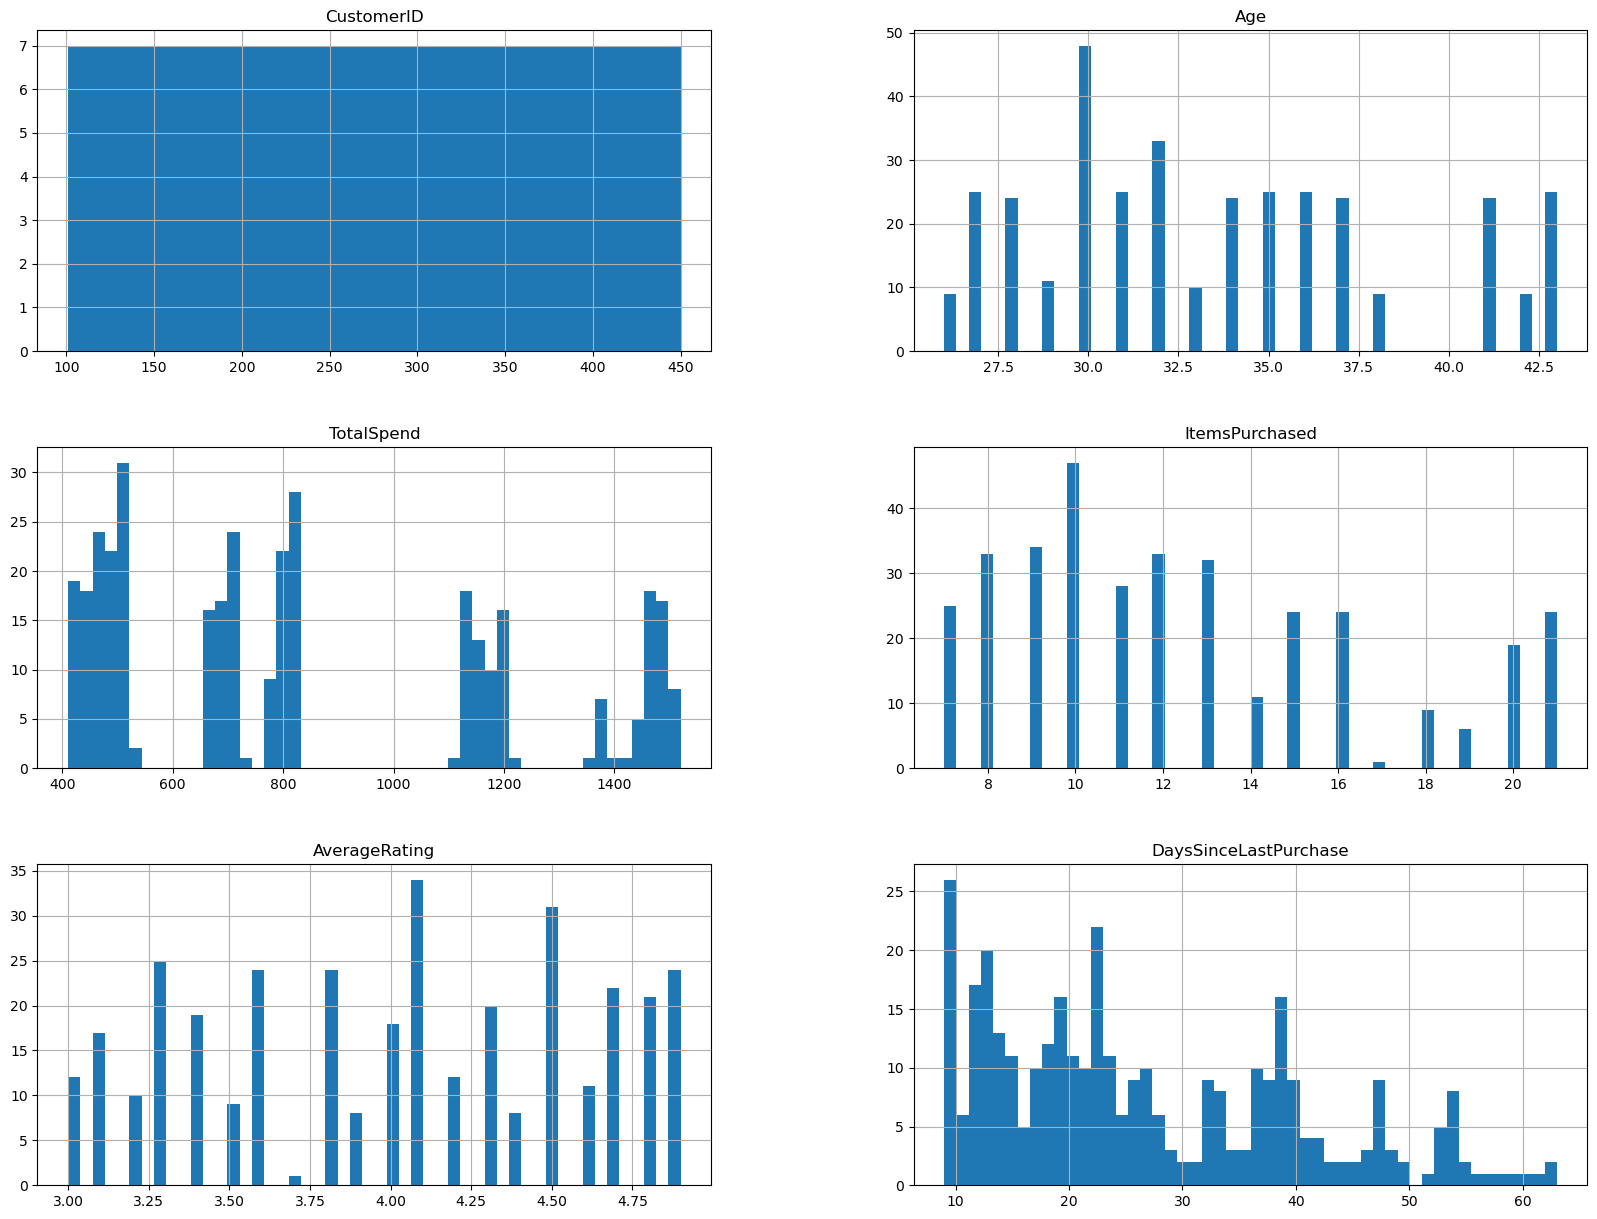

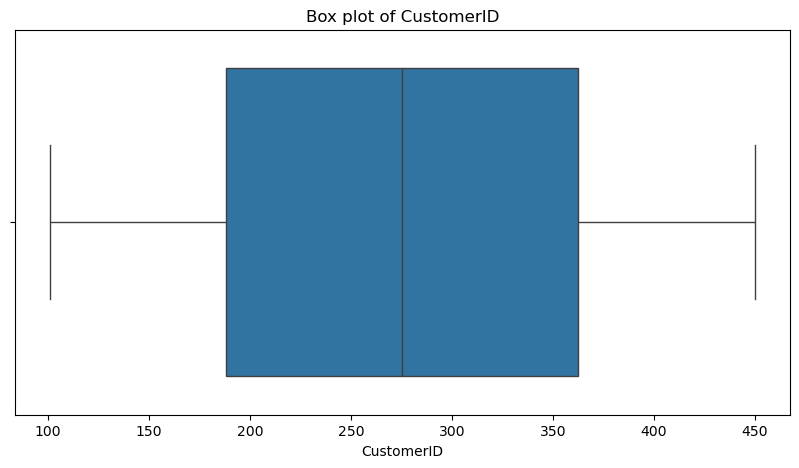

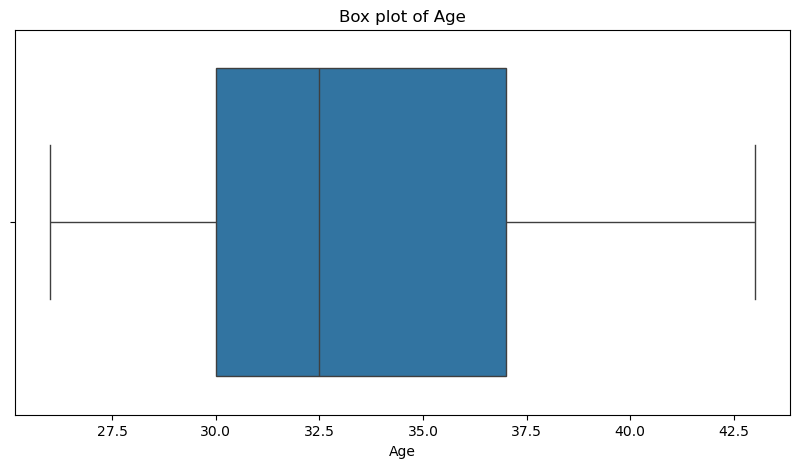

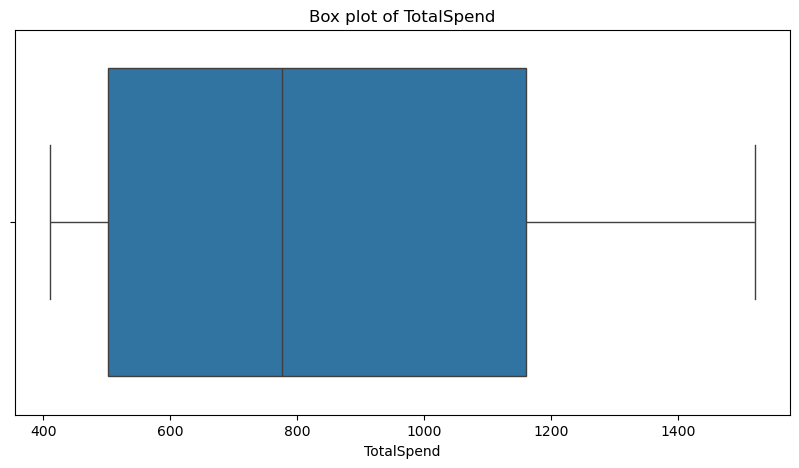

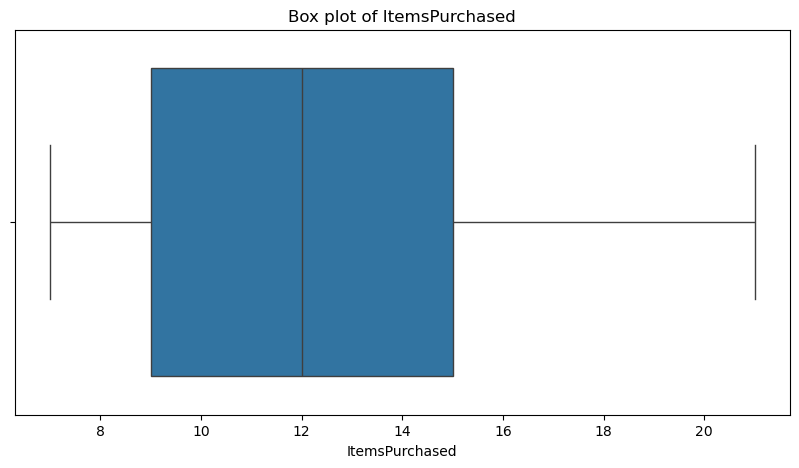

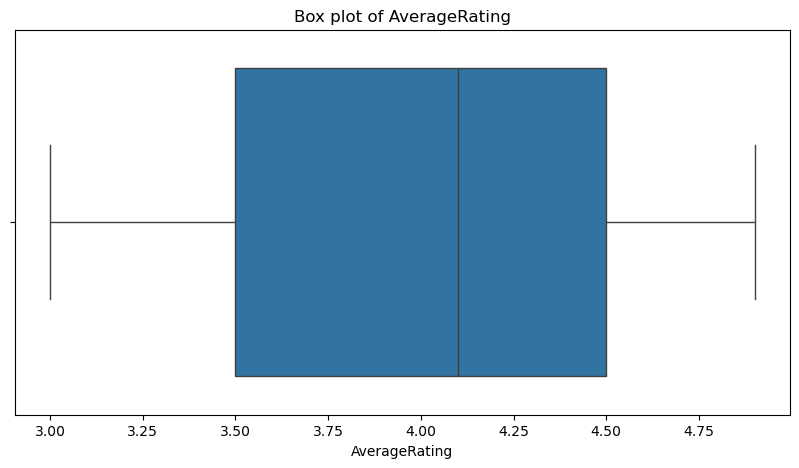

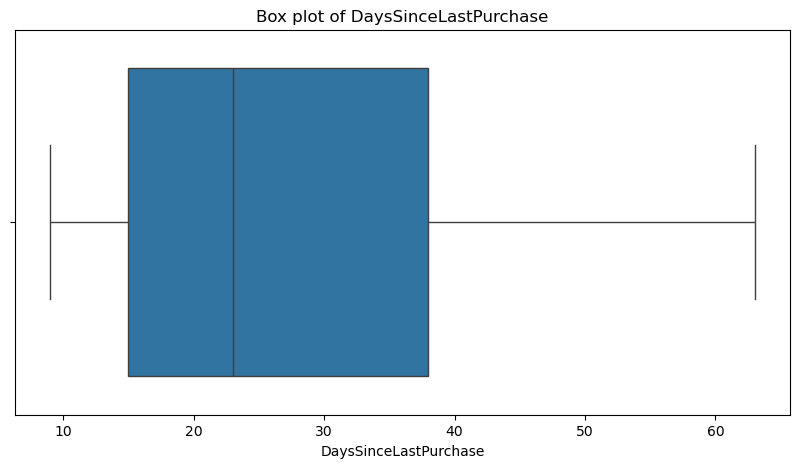

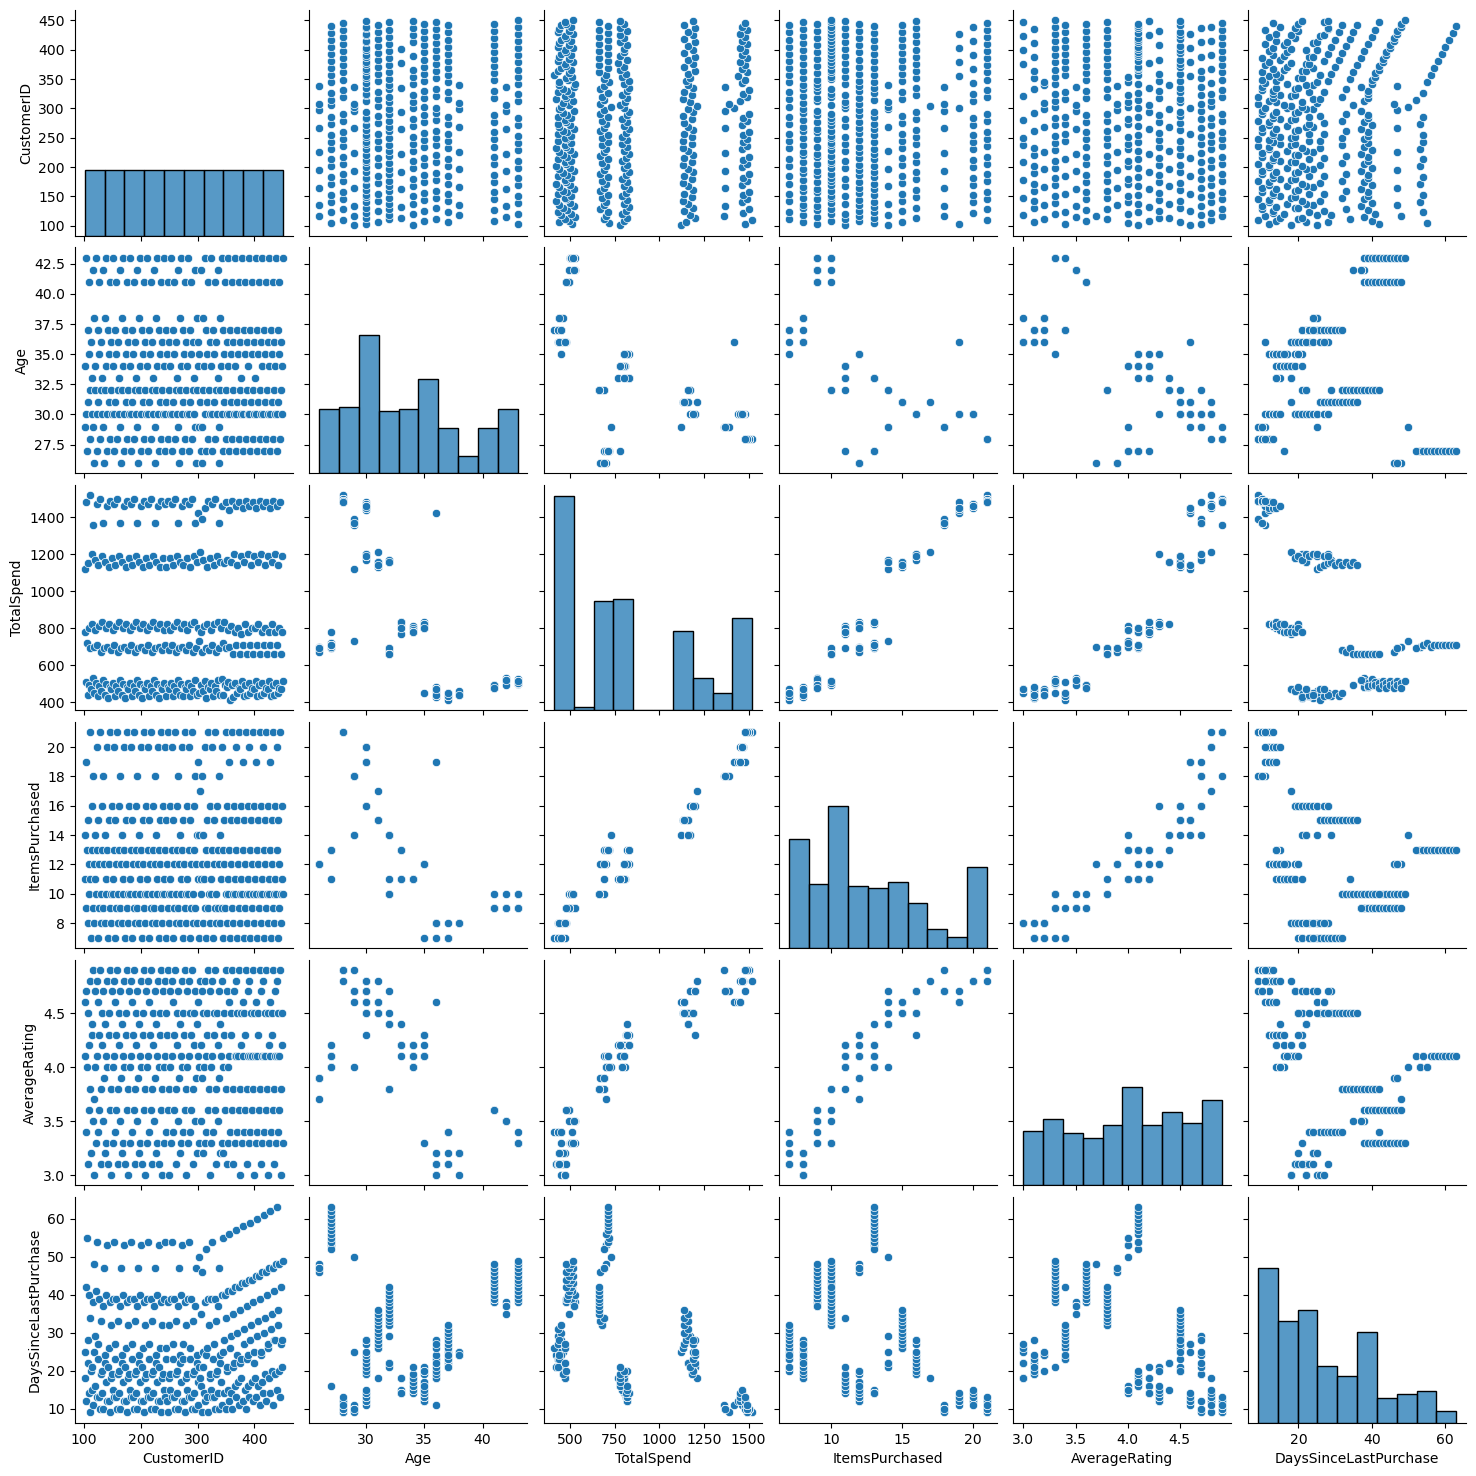

In [22]:
# Histograms for numerical columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots to identify outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Pair plots for visualizing relationships between numerical features
sns.pairplot(df)
plt.show()


In [25]:
# Calculate Z-scores for numerical columns
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)


Outliers using Z-score:
Empty DataFrame
Columns: [CustomerID, Gender, Age, City, MembershipType, TotalSpend, ItemsPurchased, AverageRating, DiscountApplied, DaysSinceLastPurchase, SatisfactionLevel]
Index: []


In [27]:
z_scores


,CustomerID,Age,TotalSpend,ItemsPurchased,AverageRating,DaysSinceLastPurchase
0,-1.727109,-0.945152,0.760130,0.337346,1.001981,-0.118359
1,-1.717212,0.082826,-0.179459,-0.385538,0.139479,-0.639907
2,-1.707314,1.933185,-0.925570,-0.867461,-1.068024,1.148256
3,-1.697417,-0.739557,1.756144,1.542153,1.174482,-1.086947
4,-1.687519,-1.356343,-0.345692,0.096385,-0.033022,2.116844
...,...,...,...,...,...,...
345,1.687519,-0.328365,-0.511924,-0.626500,-0.378022,1.148256
346,1.697417,0.494017,-1.036899,-1.108422,-1.758026,0.030654
347,1.707314,-0.739557,0.955405,0.819269,0.829481,0.105161
348,1.717212,0.082826,-0.180289,-0.385538,0.311979,-0.416386


In [28]:
# Identify outliers (rows with Z-scores > 3 or < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers using Z-score:")
print(outliers)


Outliers using Z-score:
Empty DataFrame
Columns: [CustomerID, Gender, Age, City, MembershipType, TotalSpend, ItemsPurchased, AverageRating, DiscountApplied, DaysSinceLastPurchase, SatisfactionLevel]
Index: []
